In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.drop(columns='Unnamed: 0', axis=True, inplace=True)

<Axes: xlabel='TV', ylabel='Count'>

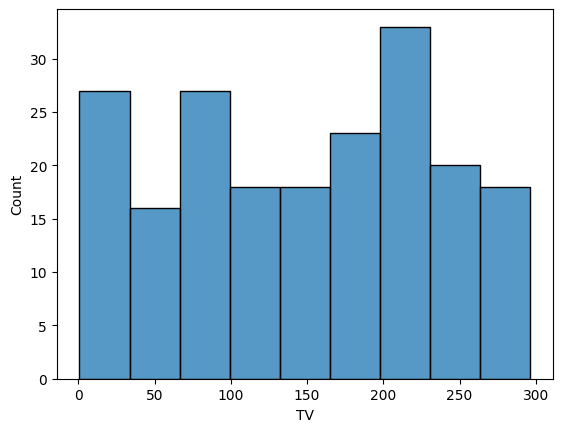

In [56]:
sns.histplot(df['TV'])

<Axes: xlabel='radio', ylabel='Count'>

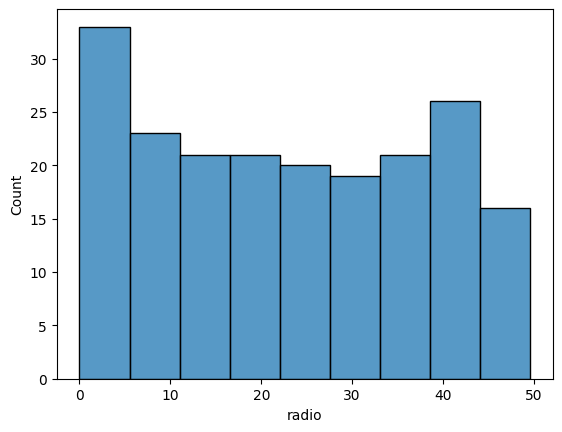

In [57]:
sns.histplot(df['radio'])

<Axes: xlabel='newspaper', ylabel='Count'>

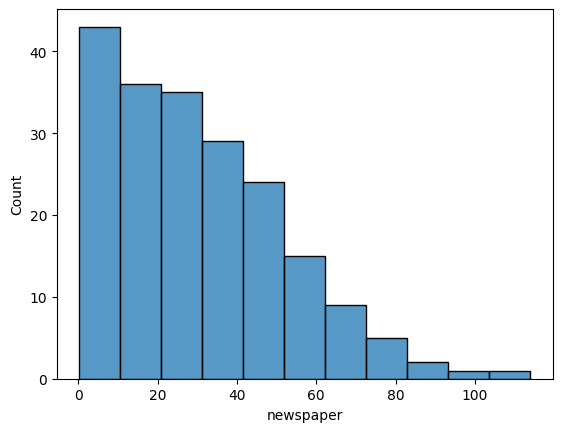

In [58]:
sns.histplot(df['newspaper'])

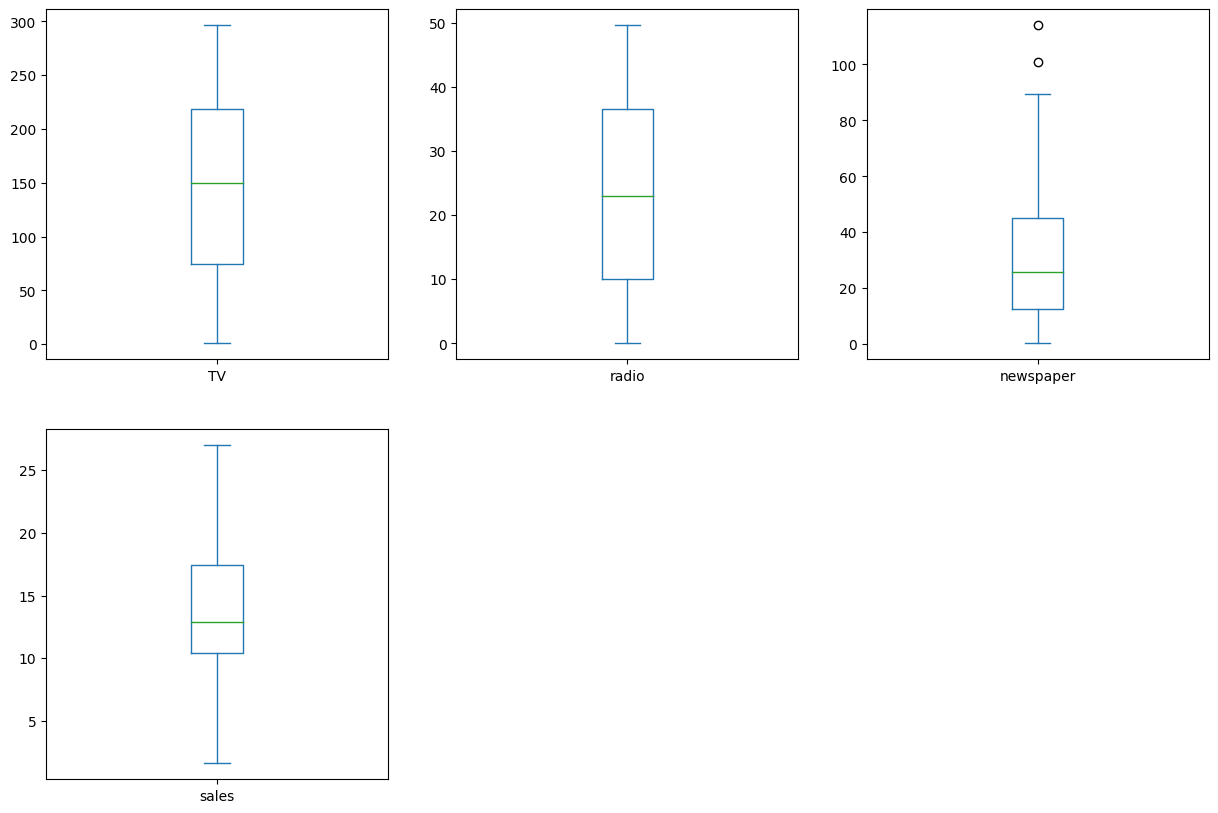

In [10]:
import matplotlib.pyplot as plt
df.plot(kind="box", subplots=True, layout=(2,3), figsize=(15,10))
plt.show()

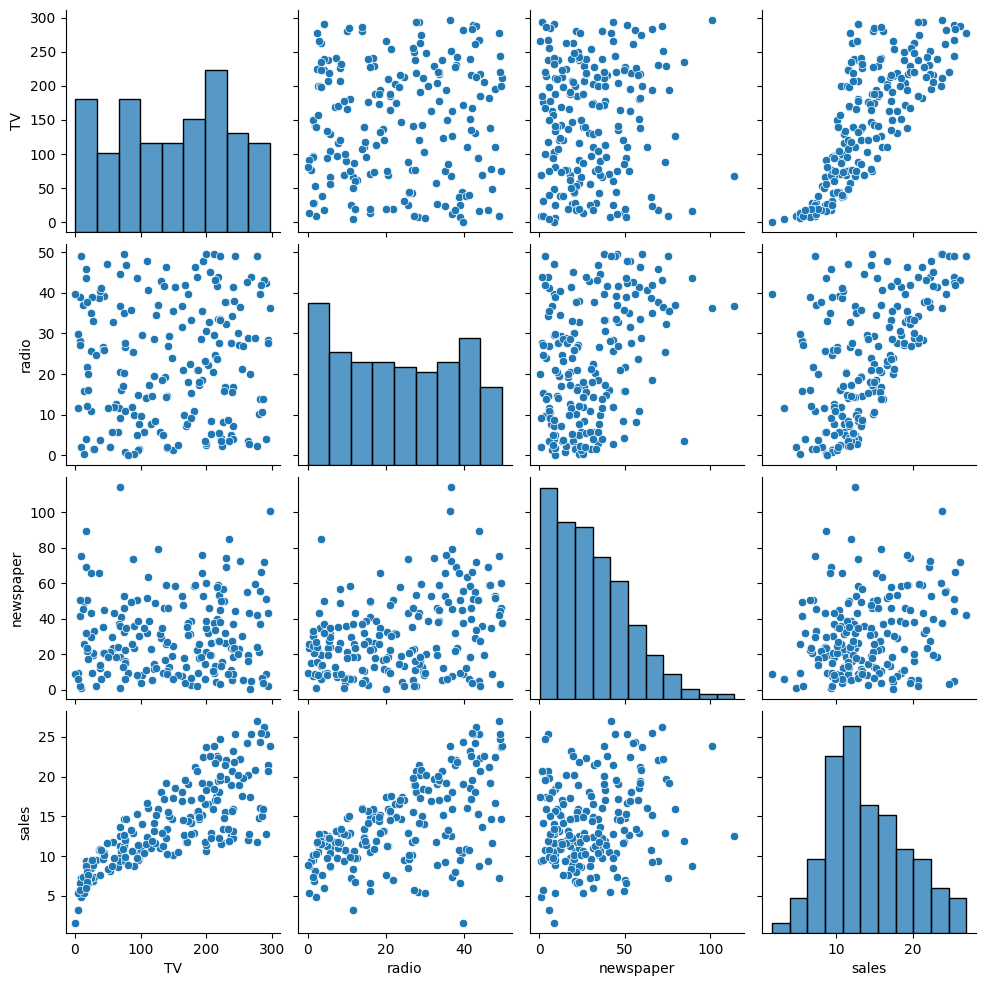

In [11]:
sns.pairplot(df)

<Axes: >

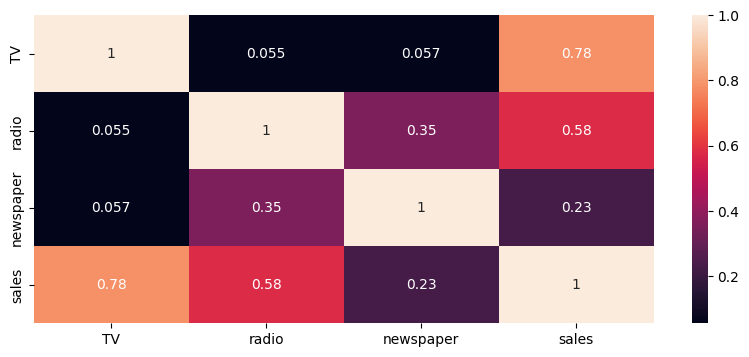

In [13]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot = True)

In [14]:
X=df.drop(columns='sales', axis=1)
y=df['sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

In [29]:
reg.fit(X_test, y_test)

LinearRegression()

In [32]:
reg.score(X_test, y_test)

0.8933785146758415

In [33]:
reg.score(X_train, y_train)

0.8767740349226146

In [34]:
y_pred = reg.predict(X_test)
y_pred[:5]

array([15.96672973, 20.24616891, 21.98818368,  9.44730126, 22.43880522])

In [35]:
y_pred_train = reg.predict(X_train)
y_pred_train[:5]

array([19.1556315 , 15.72918854, 11.30993201,  9.4384724 , 18.35678346])

In [31]:
y_pred

array([15.96672973, 20.24616891, 21.98818368,  9.44730126, 22.43880522,
       12.16280956, 21.05625754,  7.52321982, 14.78393568, 15.35193933,
        9.01705273,  6.67749464, 14.31549993,  8.49994565, 10.25418796,
       12.60007295,  7.8168256 , 16.85922278, 10.02007105, 19.58191654,
       19.04943327, 11.15426119, 11.81549013, 20.8401748 ,  8.34244845,
        6.0496815 , 20.64400131, 12.55846891,  9.28982493,  8.30684867,
       13.40880145,  9.96253982, 20.59770623, 10.1815305 , 19.07187844,
       20.84158722, 13.49535981, 20.89017749, 11.56730196,  4.70383371,
       10.07557126, 13.61691818,  9.45258921,  8.30166724, 14.659114  ,
        5.68787815,  8.94552145, 14.39163753,  9.00792721, 11.51738234,
       14.557434  , 12.7277864 , 10.85741922,  9.50723432,  7.0835031 ,
       10.28412358,  9.66710807, 24.04710765,  7.45515324, 13.67793348])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 2.9112578966943947


In [41]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean squared error:", rmse)

Mean squared error: 1.7062408671387503


In [44]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 1.4200974234270405


In [45]:
import pickle
with open('Advertising_model.pkl', 'wb') as file:
    pickle.dump(reg, file)

In [47]:
import pickle
with open('Advertising_model.pkl', 'rb') as f:
    reg = pickle.load(f)
new_data = [[230.1, 37.8, 69.2]]
prediction = reg.predict(new_data)
print(prediction)

[20.07175844]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
from ipywidgets import FloatSlider
from IPython.display import display
def predict_sales(TV, Radio, Newspaper):
  model_input = [[TV, Radio, Newspaper]]
  prediction = reg.predict(model_input)[0]
  print(f"Predicted sales: {prediction}")
TV_slider = FloatSlider(min=0, max=300, value=150, description='TV')
Radio_slider = FloatSlider(min=0, max=50, value=25, description='Radio')
Newspaper_slider = FloatSlider(min=0, max=100, value=50, description='Newspaper')
display(TV_slider, Radio_slider, Newspaper_slider)
def update_prediction(change):
  TV = TV_slider.value
  Radio = Radio_slider.value
  Newspaper = Newspaper_slider.value
  predict_sales(TV, Radio, Newspaper)
TV_slider.observe(update_prediction, names='value')
Radio_slider.observe(update_prediction, names='value')
Newspaper_slider.observe(update_prediction, names='value')

FloatSlider(value=150.0, description='TV', max=300.0)

FloatSlider(value=25.0, description='Radio', max=50.0)

FloatSlider(value=50.0, description='Newspaper')

Predicted sales: 13.787403016638498


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales: 13.425347553566253


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales: 13.308504637221446


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales: 12.357069461270875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales: 11.622628272817803


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales: 11.64498298152351


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sales: 11.789543431153763


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
from ipywidgets import Text
# Add a text box for user input
user_input = Text(description='Enter values separated by commas:')
display(user_input)
def predict_from_user_input(sender):
  try:
    TV, Radio, Newspaper = map(float, user_input.value.split(','))
    predict_sales(TV, Radio, Newspaper)
  except ValueError:
    print("Invalid input. Please enter values separated by commas.")
user_input.on_submit(predict_from_user_input)

Text(value='', description='Enter values separated by commas:')

Predicted sales: 11.47616561053363


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
